<a href="https://colab.research.google.com/github/Srija556/churn-prediction-project/blob/main/notebooks/churn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import files
uploaded = files.upload()


Saving Telco_Customer_Churn.csv to Telco_Customer_Churn (1).csv


In [34]:
import pandas as pd
df = pd.read_csv("Telco_Customer_Churn.csv")


In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4 non-null      object 
 1   SeniorCitizen     4 non-null      int64  
 2   Partner           4 non-null      int64  
 3   Dependents        4 non-null      int64  
 4   tenure            4 non-null      int64  
 5   PhoneService      4 non-null      int64  
 6   MultipleLines     4 non-null      int64  
 7   InternetService   4 non-null      object 
 8   OnlineSecurity    4 non-null      int64  
 9   OnlineBackup      4 non-null      int64  
 10  DeviceProtection  4 non-null      int64  
 11  TechSupport       4 non-null      int64  
 12  StreamingTV       4 non-null      int64  
 13  StreamingMovies   4 non-null      int64  
 14  Contract          4 non-null      object 
 15  PaperlessBilling  4 non-null      int64  
 16  PaymentMethod     4 non-null      object 
 17  M

In [36]:
df.isnull().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [37]:
df['Churn'].value_counts()


,count
Churn,
1,2
0,2


In [38]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col} → {df[col].unique()}")

df.describe()



gender → ['Female' 'Male']
InternetService → ['DSL' 'Fiber optic']
Contract → ['Month-to-month' 'Two year' 'One year']
PaymentMethod → ['Electronic check' 'Mailed check' 'Bank transfer' 'Credit card']


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,4.00,4.00,4.00,4.000000,4.00,4.00000,4.00,4.00,4.00,4.00,4.00000,4.00000,4.00,4.000000,4.00000,4.00000
mean,0.25,0.75,0.25,20.500000,0.75,0.50000,0.25,0.75,0.75,0.25,0.50000,0.50000,0.75,45.737500,967.06250,0.50000
std,0.50,0.50,0.50,22.397917,0.50,0.57735,0.50,0.50,0.50,0.50,0.57735,0.57735,0.50,12.325609,1037.67669,0.57735
min,0.00,0.00,0.00,1.000000,0.00,0.00000,0.00,0.00,0.00,0.00,0.00000,0.00000,0.00,29.850000,29.85000,0.00000
25%,0.00,0.75,0.00,1.750000,0.75,0.00000,0.00,0.75,0.75,0.00,0.00000,0.00000,0.75,39.187500,88.57500,0.00000
50%,0.00,1.00,0.00,18.000000,1.00,0.50000,0.00,1.00,1.00,0.00,0.50000,0.50000,1.00,48.075000,974.45000,0.50000
75%,0.25,1.00,0.25,36.750000,1.00,1.00000,0.25,1.00,1.00,0.25,1.00000,1.00000,1.00,54.625000,1852.93750,1.00000
max,1.00,1.00,1.00,45.000000,1.00,1.00000,1.00,1.00,1.00,1.00,1.00000,1.00000,1.00,56.950000,1889.50000,1.00000


In [39]:
df.duplicated().sum()
df = df.drop_duplicates()


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the uploaded CSV
df = pd.read_csv("Telco_Customer_Churn.csv")


**churn distribution**

/tmp/ipython-input-41-711733800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


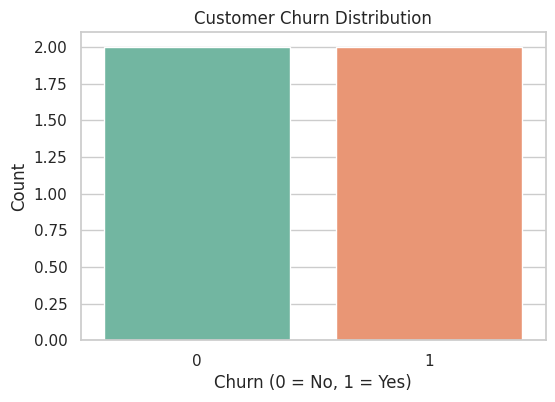

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


**Churn by gender**

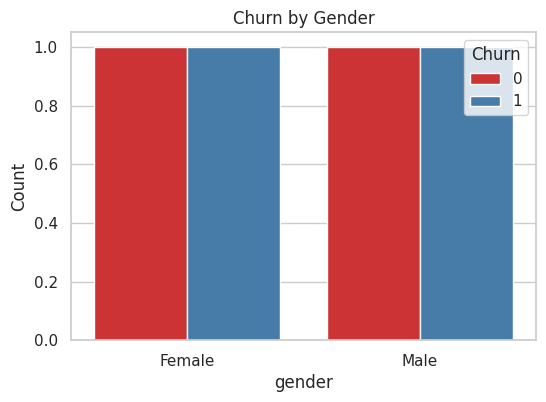

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='Churn', palette='Set1')
plt.title("Churn by Gender")
plt.ylabel("Count")
plt.show()


**Churn by Tenure**

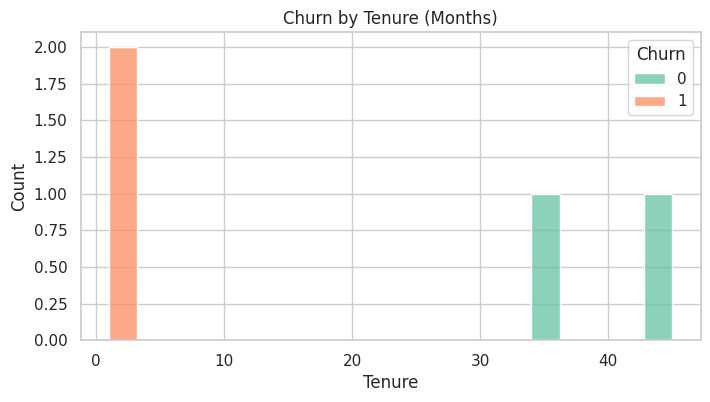

In [43]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=20, palette='Set2')
plt.title("Churn by Tenure (Months)")
plt.xlabel("Tenure")
plt.show()


**churn by Monthly Charges**

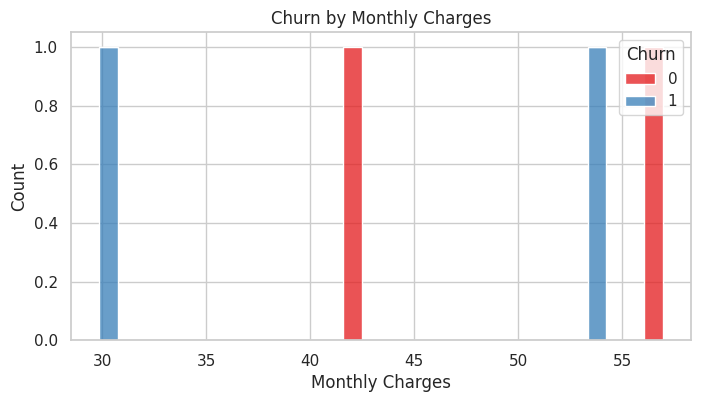

In [44]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30, palette='Set1')
plt.title("Churn by Monthly Charges")
plt.xlabel("Monthly Charges")
plt.show()


In [45]:

if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)


In [46]:
# Target
y = df['Churn']
X = df.drop('Churn', axis=1)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

print("Encoded features shape:", X.shape)


Encoded features shape: (4, 22)


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (3, 22)
Test set shape: (1, 22)


In [48]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [49]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Confusion Matrix:
[[1]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [50]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Re-train logistic regression for comparison
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_pred)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

# Print all model scores
print("Logistic Regression Accuracy:", log_acc)
print("Random Forest Accuracy:", rf_acc)
print("Gradient Boosting Accuracy:", gb_acc)


Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 0.0
Gradient Boosting Accuracy: 1.0


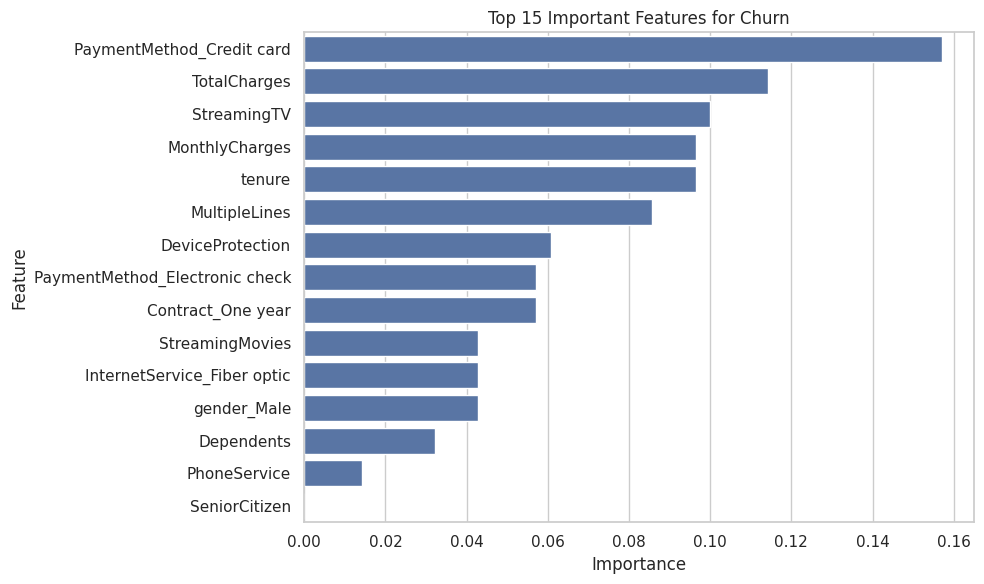

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns

# Sort and plot
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Top 15 Important Features for Churn")
plt.tight_layout()
plt.show()


In [52]:


print("✅ Project completed successfully!")


✅ Project completed successfully!
